In [1]:
import cv2 # opencv
from matplotlib import pyplot as plt # matplotlib
import numpy as np # numpy
%matplotlib inline 

In [2]:
def open_image(path):
    imageToConvert = cv2.imread(path)
    return cv2.cvtColor(imageToConvert, cv2.COLOR_BGR2RGB)

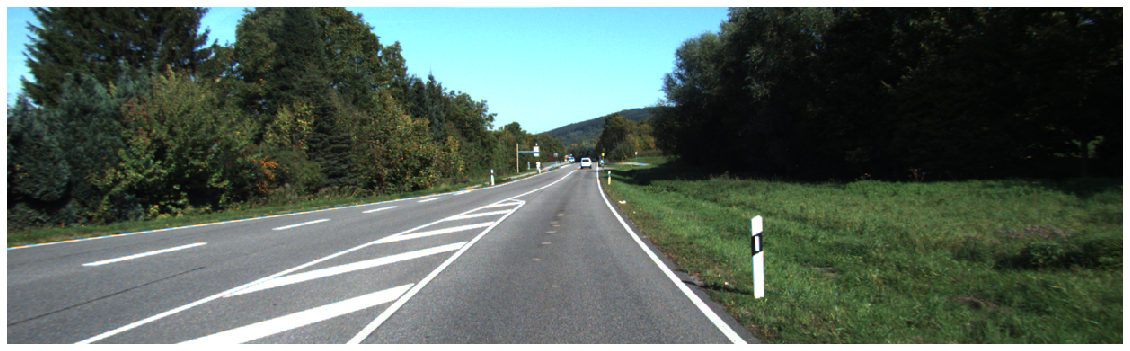

In [3]:
img = open_image('umm_000048.png')
plt.figure(figsize = (20,10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Ejercicio 1.1 

Podríamos llamar al coeficiente de luminancia "alpha" (si es menor que uno, baja la luminancia, y viceversa), y "beta" al coeficiente de saturación (si es menor que uno baja la saturación, y viceversa). El workflow a implementar consiste en los siguientes pasos:

    1.Normalizar los valores de RGB del pixel
    2.RGB -> YIQ (utilizando la segunda matriz)
    3.Y’ := aY;
    4.I’ := bI;   Q’ := bQ;
    5.Chequear que Y’ <= 1 (para que no se vaya de rango)
    6.Chequear -0.5957 < I’ < 0.5957  y  -0.5226 < Q’ < 0.5226
    7.Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)
    8.Convertir R’G’B’ a bytes y graficar el pixel

In [4]:
def normalize_image(img):
    normalized_image =  np.zeros((len(img),len(img[0]),len(img[0][0])))
    for i in range(len(img)):
        for j in range(len(img[i])):
            for k in range(len(img[i][j])):
                normalized_image[i][j][k] = img[i][j][k] / 255  
    return normalized_image

In [5]:
normalized_image = normalize_image(img)

In [6]:
RGB_2_YIQ_MATRIX = np.array([[ 0.299, 0.587, 0.114], 
                          [ 0.595716, -0.274453, -0.321263], 
                          [ 0.211456, -0.522591, 0.311135]])

YIQ_2_RGB_MATRIX = np.array([[1, 0.9663, 0.6210], 
                          [1, -0.2721, -0.6474], 
                          [1, -1.1070, 1.7046]])

In [7]:
def rgb_2_yiq(img):
    yiq_image =  np.zeros((len(img),len(img[0]),len(img[0][0])))
    for i in range(len(img)):
        for j in range(len(img[i])):
            yiq_image[i][j] = RGB_2_YIQ_MATRIX.dot(img[i][j])
    return yiq_image

def yiq_2_rgb(img):
    rgb_image =  np.zeros((len(img),len(img[0]),len(img[0][0])))
    for i in range(len(img)):
        for j in range(len(img[i])):
            rgb_image[i][j] = YIQ_2_RGB_MATRIX.dot(img[i][j])
    return rgb_image

In [8]:
yiq_image = rgb_2_yiq(normalized_image)

In [9]:
def alterate_yiq_values(img, alpha, beta):
    altered_image = np.zeros((len(img),len(img[0]),len(img[0][0])))
    for i in range(len(img)):
        for j in range(len(img[i])):
            altered_image[i][j][0] = alpha * img[i][j][0]
            if(altered_image[i][j][0] > 1):
                altered_image[i][j][0] = 1
            altered_image[i][j][1] = beta * img[i][j][1]
            if(altered_image[i][j][1] > 0.5957):
                altered_image[i][j][1] = 0.5957
            elif altered_image[i][j][1] < -0.5957:
                altered_image[i][j][1] = -0.5957
            altered_image[i][j][2] = beta * img[i][j][2]
            if(altered_image[i][j][2] > 0.5226):
                altered_image[i][j][2] = 0.5226
            elif altered_image[i][j][2] < -0.5226:
                altered_image[i][j][2] = -0.5226
    return altered_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


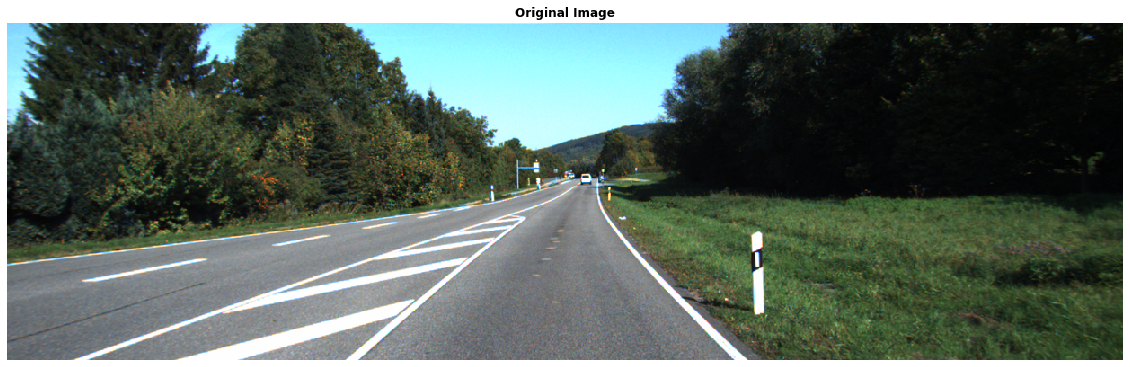

In [10]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(yiq_image))
plt.axis('off')
plt.title('Original Image', fontweight='bold')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


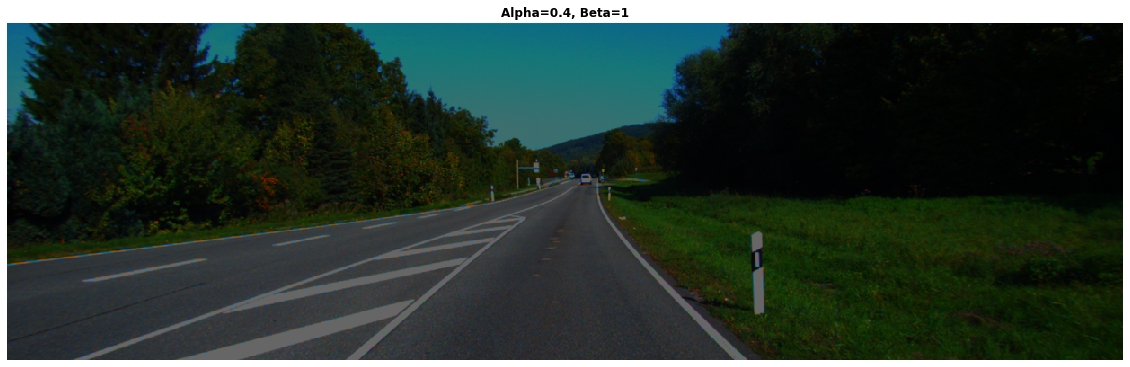

In [11]:
alpha = 0.4
beta = 1
altered_yiq_image = alterate_yiq_values(yiq_image, alpha, beta)
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(altered_yiq_image))
plt.axis('off')
plt.title("Alpha=" + str(alpha) + ", Beta=" + str(beta), fontweight='bold')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


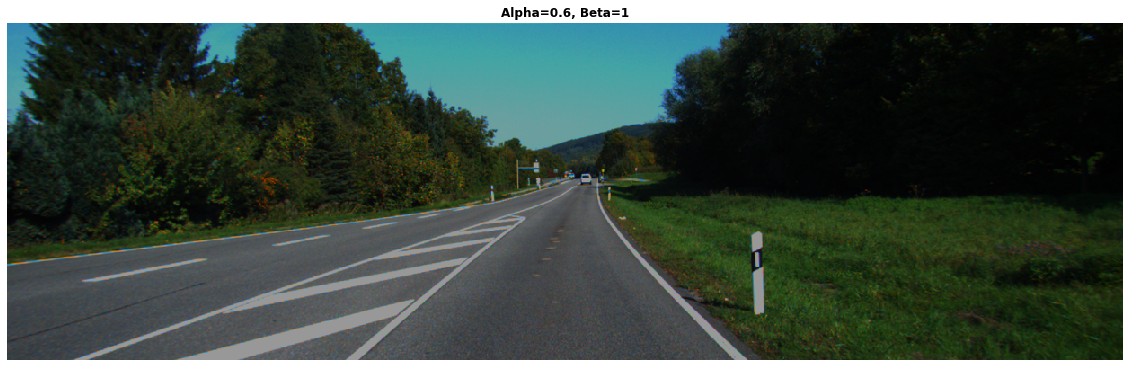

In [12]:
alpha = 0.6
beta = 1
altered_yiq_image = alterate_yiq_values(yiq_image, alpha, beta)
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(altered_yiq_image))
plt.axis('off')
plt.title("Alpha=" + str(alpha) + ", Beta=" + str(beta), fontweight='bold')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


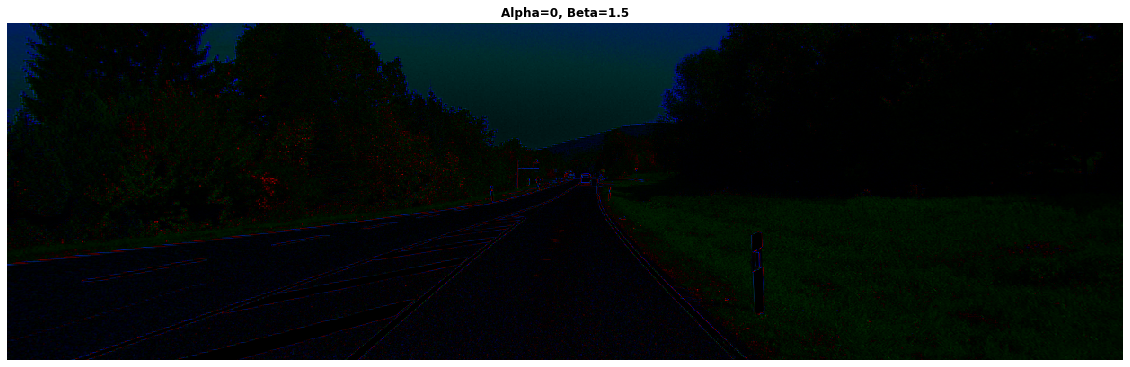

In [30]:
alpha = 0
beta = 1.5
altered_yiq_image = alterate_yiq_values(yiq_image, alpha, beta)
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(altered_yiq_image))
plt.axis('off')
plt.title("Alpha=" + str(alpha) + ", Beta=" + str(beta), fontweight='bold')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


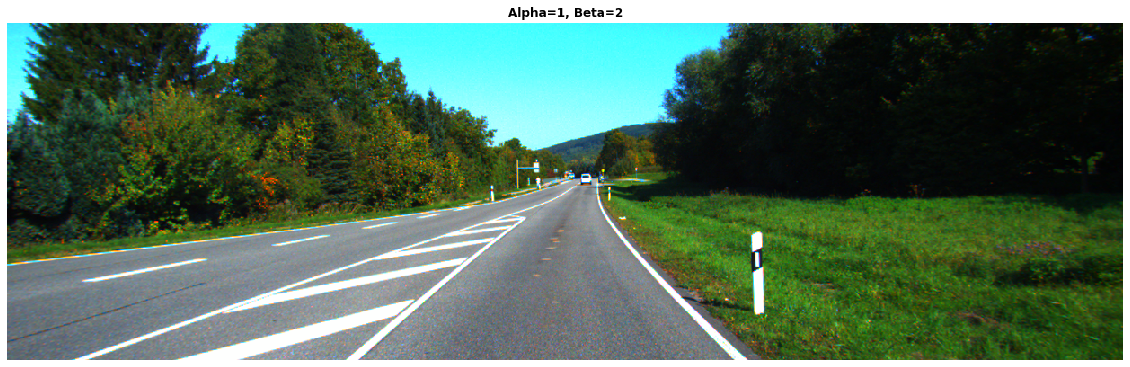

In [31]:
alpha = 1
beta = 2
altered_yiq_image = alterate_yiq_values(yiq_image, alpha, beta)
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(altered_yiq_image))
plt.axis('off')
plt.title("Alpha=" + str(alpha) + ", Beta=" + str(beta), fontweight='bold')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


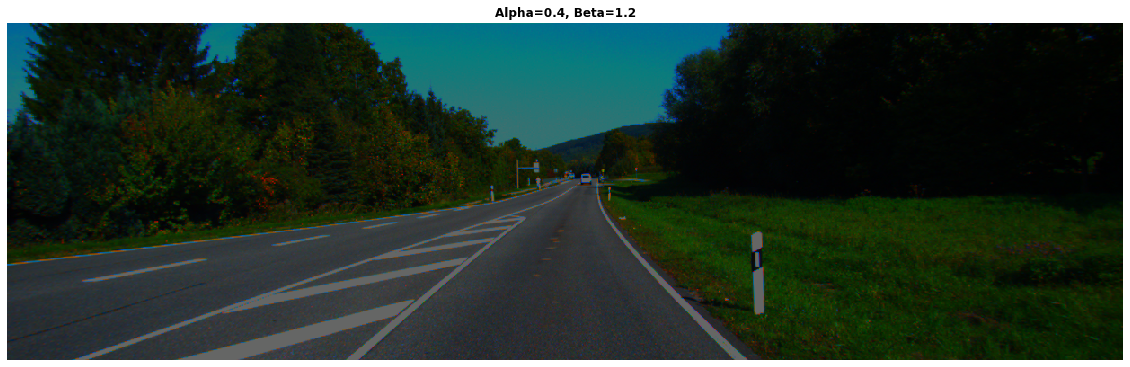

In [15]:
alpha = 0.4
beta = 1.2
altered_yiq_image = alterate_yiq_values(yiq_image, alpha, beta)
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(altered_yiq_image))
plt.axis('off')
plt.title("Alpha=" + str(alpha) + ", Beta=" + str(beta), fontweight='bold')
plt.show()

### Ejercicio 1.2

Desarrollar un aplicativo que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.Los controles para elegir los filtros los organizan como les resulte más cómodo.

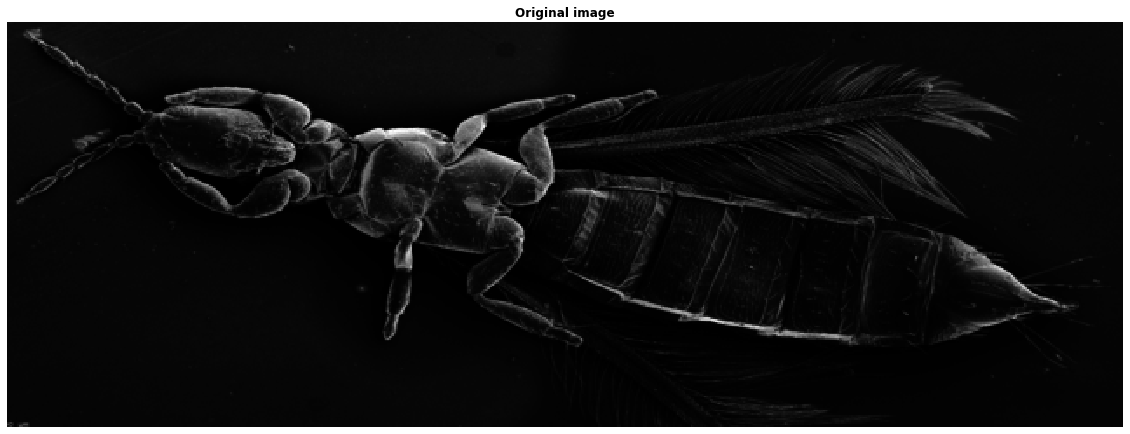

In [33]:
insect_image = open_image('Insect.png')
plt.figure(figsize = (20,10))
plt.imshow(insect_image)
plt.title('Original image', fontweight='bold')
plt.axis('off')
plt.show()

In [17]:
insect_image_normalized = normalize_image(insect_image)
insect_image_yiq = rgb_2_yiq(insect_image_normalized)

In [18]:
def get_y_values_of_an_image(img):
    y_img = np.zeros((len(img),len(img[0])))
    for i in range(len(img)):
        for j in range(len(img[i])):
            y_img[i][j] = img[i][j][0]
    return y_img

Procederemos a realizar tres histogramas con valores entre 0 y 1, los cuales tendrán las siguientes escalas:
  - 10 valores
  - 50 valores
  - 100 valores

In [19]:
insect_image_y = get_y_values_of_an_image(insect_image_yiq)
insect_image_y = np.float32(insect_image_y)

In [20]:
def plot_histogram(histogram, bins):
    bins = np.array(bins)
    plt.bar(bins[:-1], histogram, 1/len(histogram))
    plt.title("Histogram with " + str(len(histogram)) + " columns")
    plt.show()

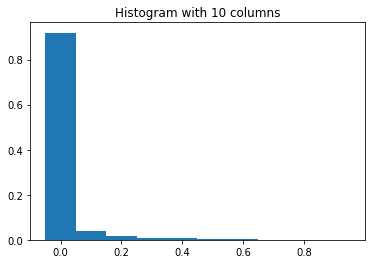

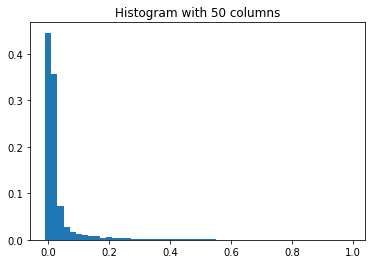

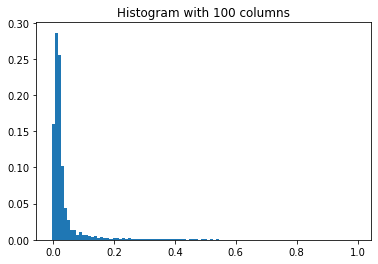

In [21]:
total_pixels = insect_image_y.shape[0] * insect_image_y.shape[1]
ten_hist, bins = np.histogram(insect_image_y, 10, [0,1])
plot_histogram(ten_hist/total_pixels, bins)
fifty_hist, bins = np.histogram(insect_image_y, 50, [0,1])
plot_histogram(fifty_hist/total_pixels, bins)
one_hundred_hist, bins = np.histogram(insect_image_y, 100, [0,1])
plot_histogram(one_hundred_hist/total_pixels, bins)

#### Al ser una imagen osucra, podemos observar como sus histogramas se concentran en los valores mas chicos.

In [56]:
def square_filter(img, correction):
    filtered_img = np.zeros((len(img),len(img[0])))
    for i in range(len(img)):
        for j in range(len(img[i])):
            filtered_img[i][j] = np.power(img[i][j], correction)
            if(filtered_img[i][j] > 1):
                filtered_img[i][j] = 1
    return filtered_img

In [57]:
def square_root_filter(img, correction):  
    img = cv2.sqrt(img, correction)
    return img

In [90]:
def lineal_filter(img, correction):
    img *= correction
    return img

In [91]:
insect_image_y_squared = square_filter(insect_image_y, 2)
insect_image_y_root_squared = square_root_filter(insect_image_y, 2)
insect_image_y_lineal_filter = lineal_filter(insect_image_y, 2)

In [92]:
def replace_y_values_in_an_image(original_image, y_image):
    image_replaced = np.zeros((len(original_image),len(original_image[0]),len(original_image[0][0])))
    for i in range(len(original_image)):
        for j in range(len(original_image[i])): 
            image_replaced[i][j][0] = y_image[i][j]
            image_replaced[i][j][1] = original_image[i][j][1]
            image_replaced[i][j][2] = original_image[i][j][2]
    return image_replaced

In [93]:
insect_image_squared_yiq = replace_y_values_in_an_image(insect_image_yiq, insect_image_y_squared)
insect_image_root_squared_yiq = replace_y_values_in_an_image(insect_image_yiq, insect_image_y_root_squared)
insect_image_lineal_filter_yiq = replace_y_values_in_an_image(insect_image_yiq, insect_image_y_lineal_filter)

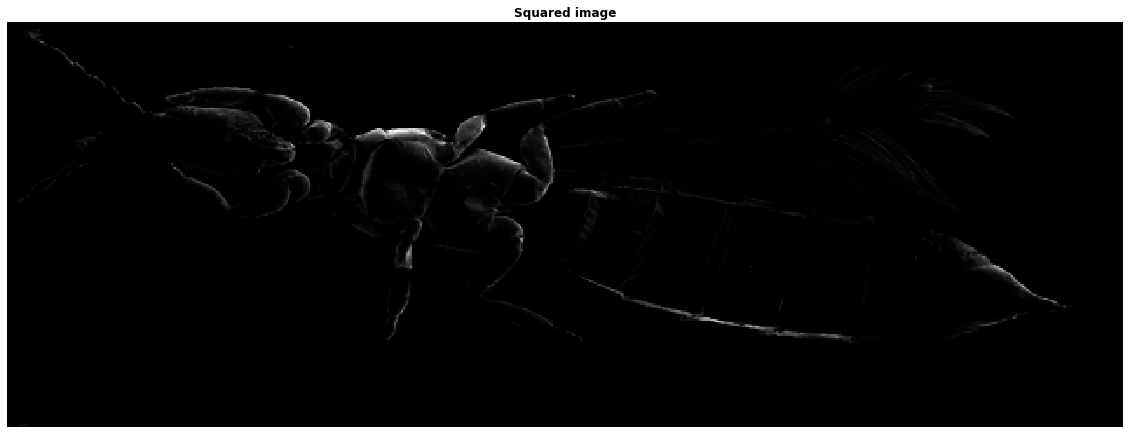

In [88]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(insect_image_squared_yiq))
plt.title('Squared image', fontweight='bold')
plt.axis('off')
plt.show()

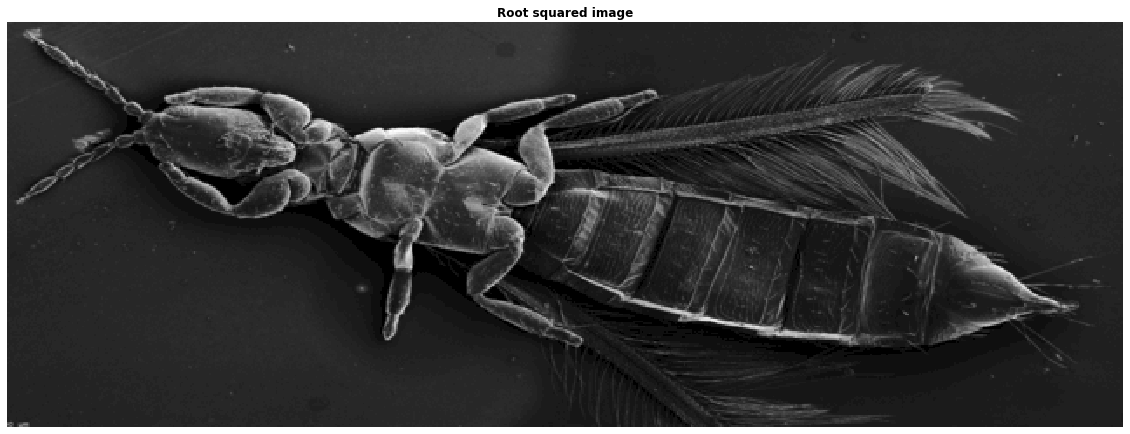

In [89]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(insect_image_root_squared_yiq))
plt.title('Root squared image', fontweight='bold')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


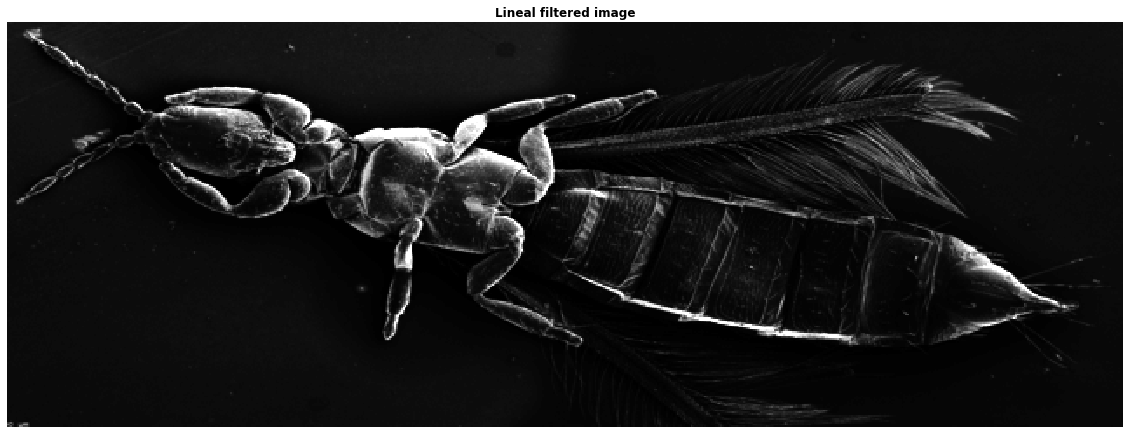

In [94]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(insect_image_lineal_filter_yiq))
plt.title('Lineal filtered image', fontweight='bold')
plt.axis('off')
plt.show()